In [49]:
import cv2
import numpy as np
import glob

from matplotlib import pyplot as plt

In [ ]:
image = np.zeros((300, 300, 3))

In [ ]:
pts1 = np.array([[100, 150], [200, 250],
                [250, 200], [150, 100]
               ],
               np.int32)

pts1 = np.array([[100, 100], [200, 100],
                [200, 50], [100, 50]
               ],
               np.int32)
 
pts1 = pts1.reshape((-1, 1, 2))

In [ ]:
pts2 = np.array([[120, 200], [70, 50], 
                [90, 40], [140, 190]
               ],
               np.int32)

pts2 = np.array([[125, 125], [225, 125],
                [225, 75], [125, 75]
               ],
               np.int32)
 
pts2 = pts2.reshape((-1, 1, 2))

In [ ]:
# Blue color in BGR
color = (255, 0, 0)
 
# Line thickness of 2 px
thickness = 2
 
# Using cv2.polylines() method
# Draw a Blue polygon with
# thickness of 1 px
image = cv2.polylines(image, [pts1],
                      True, color, thickness)
image = cv2.polylines(image, [pts2],
                      True, color, thickness)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [ ]:
float("inf") == float("inf")

In [ ]:
def calcSlopeIntercept(x1, y1, x2, y2):
    
    if x2 - x1 == 0:
        return float('inf'), x1
    
    m = ( y2 - y1 ) / ( x2 - x1 )
    
    b = y1 - m * x1
    
    return m, b

l = len(pts2)

for i in range(l):
    j = (i + 1) % l
    print( calcSlopeIntercept(pts2[i][0][0], pts2[i][0][1], pts2[j][0][0], pts2[j][0][1]) )

In [ ]:
subject_polygon = [(100, 100), (200, 100), (200, 50), (100, 50)]
clipping_polygon = [(125, 125), (225, 125), (225, 75), (125, 75)]

In [ ]:
def findIntersectionInRange(m1, b1, range1, m2, b2, range2):
    if m1 == m2:
        return None, None
    
    elif m1 == float('inf'):
        x_intersect = b1
        y_intersect = m2 * x_intersect + b2
    elif m2 == float('inf'):
        print('here')
        x_intersect = b2
        y_intersect = m1 * x_intersect + b1
    elif m1 == 0:
        y_intersect = b1
        x_intersect = ( y_intersect - b2 ) / m2
    elif m2 == 0:
        y_intersect = b2
        x_intersect = ( y_intersect - b1 ) / m1
    else:
        x_intersect = (b2 - b1) / (m1 - m2)
        y_intersect = m1 * x_intersect + b1
    
    x1min = min(range1[0], range1[2])
    x2min = min(range2[0], range2[2])
    x_min = max(x1min, x2min)
    
    x1max = max(range1[0], range1[2])
    x2max = max(range2[0], range2[2])
    x_max = min(x1max, x2max)
    
#     print(x_intersect, x_min, x_max)
    
    if x_intersect >= x_min and x_intersect <= x_max:
        
        y1min = min(range1[1], range1[3])
        y2min = min(range2[1], range2[3])
        y_min = max(y1min, y2min)

        y1max = max(range1[1], range1[3])
        y2max = max(range2[1], range2[3])
        y_max = min(y1max, y2max)
        
        if y_intersect >= y_min and y_intersect <= y_max:
            return x_intersect, y_intersect
        else:
            return None, None
    else:
        return None, None
    

final_polygon = subject_polygon.copy()

for i in range(len(clipping_polygon)):
    # stores the vertices of the next iteration of the clipping procedure
    next_polygon = final_polygon.copy()
    
    final_polygon = []
    
    for j in range(len(next_polygon)):
        edge_start = next_polygon[j]
        nextEdge_idx = (j + 1) % len(next_polygon)
        edge_end = next_polygon[nextEdge_idx]
        
        
        
    
    

pts2_slope_int = []
l = len(pts2)

for i in range(l):
    j = (i + 1) % l
    m, b = calcSlopeIntercept(pts2[i][0][0], pts2[i][0][1], pts2[j][0][0], pts2[j][0][1])
    xmin, ymin, xmax, ymax = pts2[i][0][0], pts2[i][0][1], pts2[j][0][0], pts2[j][0][1]
    pts2_slope_int.append( (m, b, xmin, ymin, xmax, ymax) )

pts1_slope_int = []
l = len(pts1)

for i in range(l):
    j = (i + 1) % l
    m, b = calcSlopeIntercept(pts1[i][0][0], pts1[i][0][1], pts1[j][0][0], pts1[j][0][1])
    xmin, ymin, xmax, ymax = pts1[i][0][0], pts1[i][0][1], pts1[j][0][0], pts1[j][0][1]
    pts1_slope_int.append( (m, b, xmin, ymin, xmax, ymax) )

In [ ]:
print(pts1_slope_int[2])
print(pts2_slope_int[2])

m1, b1, x1min, y1min, x1max, y1max = pts1_slope_int[2]
m2, b2, x2min, y2min, x2max, y2max = pts2_slope_int[2]
x_intersect, y_intersect = findIntersectionInRange(m1, b1, [x1min, y1min, x1max, y1max], m2, b2, [x2min, y2min, x2max, y2max])

In [ ]:
# image = cv2.line(image, (250, 200), (150, 100), (0, 255, 0), thickness)
# image = cv2.line(image, (90, 40), (140, 190), (0, 255, 0), thickness) 

In [ ]:
intersection_points = []

for i in range(4):
    for j in range(4):
        m1, b1, x1min, y1min, x1max, y1max = pts1_slope_int[i]
        m2, b2, x2min, y2min, x2max, y2max = pts2_slope_int[j]
        x_intersect, y_intersect = findIntersectionInRange(m1, b1, [x1min, y1min, x1max, y1max], m2, b2, [x2min, y2min, x2max, y2max])
        if x_intersect is not None and y_intersect is not None:
            image = cv2.circle(image, (int(x_intersect), int(y_intersect)), radius=5, color=(255, 0, 255), thickness=2)
            intersection_points.append( (x_intersect, y_intersect) )

In [ ]:
# image = cv2.circle(image, (105, 155), radius=5, color=(255, 0, 255), thickness=1)
# image = cv2.circle(image, (105, 155), radius=5, color=(255, 0, 255), thickness=1)

In [ ]:
image = cv2.rectangle(image, (125, 75), (200, 100), color = (255, 1, 1), thickness = 1)

plt.figure(figsize=(10,10))
plt.imshow(image)

In [ ]:
pts2[0][0][0], pts2[0][0][1]

In [ ]:
pts2[1][0]

In [ ]:
import numpy as np
import warnings

# POINTS NEED TO BE PRESENTED CLOCKWISE OR ELSE THIS WONT WORK

class PolygonClipper:
    
    def __init__(self,warn_if_empty=True):
        self.warn_if_empty = warn_if_empty
    
    def is_inside(self,p1,p2,q):
        R = (p2[0] - p1[0]) * (q[1] - p1[1]) - (p2[1] - p1[1]) * (q[0] - p1[0])
        if R >= 0:
            return True
        else:
            return False

    def compute_intersection(self,p1,p2,p3,p4):
        
        """
        given points p1 and p2 on line L1, compute the equation of L1 in the
        format of y = m1 * x + b1. Also, given points p3 and p4 on line L2,
        compute the equation of L2 in the format of y = m2 * x + b2.
        
        To compute the point of intersection of the two lines, equate
        the two line equations together
        
        m1 * x + b1 = m2 * x + b2
        
        and solve for x. Once x is obtained, substitute it into one of the
        equations to obtain the value of y.
        
        if one of the lines is vertical, then the x-coordinate of the point of
        intersection will be the x-coordinate of the vertical line. Note that
        there is no need to check if both lines are vertical (parallel), since
        this function is only called if we know that the lines intersect.
        """
        
        # if first line is vertical
        if p2[0] - p1[0] == 0:
            x = p1[0]
            
            # slope and intercept of second line
            m2 = (p4[1] - p3[1]) / (p4[0] - p3[0])
            b2 = p3[1] - m2 * p3[0]
            
            # y-coordinate of intersection
            y = m2 * x + b2
        
        # if second line is vertical
        elif p4[0] - p3[0] == 0:
            x = p3[0]
            
            # slope and intercept of first line
            m1 = (p2[1] - p1[1]) / (p2[0] - p1[0])
            b1 = p1[1] - m1 * p1[0]
            
            # y-coordinate of intersection
            y = m1 * x + b1
        
        # if neither line is vertical
        else:
            m1 = (p2[1] - p1[1]) / (p2[0] - p1[0])
            b1 = p1[1] - m1 * p1[0]
            
            # slope and intercept of second line
            m2 = (p4[1] - p3[1]) / (p4[0] - p3[0])
            b2 = p3[1] - m2 * p3[0]
        
            # x-coordinate of intersection
            x = (b2 - b1) / (m1 - m2)
        
            # y-coordinate of intersection
            y = m1 * x + b1
        
        intersection = (x,y)
        
        return intersection
    
    def clip(self, subject_polygon, clipping_polygon):
        
        final_polygon = subject_polygon.copy()
        
        for i in range(len(clipping_polygon)):
            
            # stores the vertices of the next iteration of the clipping procedure
            next_polygon = final_polygon.copy()
            
            # stores the vertices of the final clipped polygon
            final_polygon = []
            
            # these two vertices define a line segment (edge) in the clipping
            # polygon. It is assumed that indices wrap around, such that if
            # i = 1, then i - 1 = K.
            c_edge_start = clipping_polygon[i - 1]
            c_edge_end = clipping_polygon[i]
            
            for j in range(len(next_polygon)):
                
                # these two vertices define a line segment (edge) in the subject
                # polygon
                s_edge_start = next_polygon[j - 1]
                s_edge_end = next_polygon[j]
                
                print('subject: ', j, s_edge_start, s_edge_end)
                
                if self.is_inside(c_edge_start,c_edge_end,s_edge_end):
                    if not self.is_inside(c_edge_start,c_edge_end,s_edge_start):
                        intersection = self.compute_intersection(s_edge_start,s_edge_end,c_edge_start,c_edge_end)
                        final_polygon.append(intersection)
                    final_polygon.append(tuple(s_edge_end))
                elif self.is_inside(c_edge_start,c_edge_end,s_edge_start):
                    intersection = self.compute_intersection(s_edge_start,s_edge_end,c_edge_start,c_edge_end)
                    final_polygon.append(intersection)
            print(final_polygon)
            print('*'*20)
        
        return np.asarray(final_polygon)
    
    def __call__(self,A,B):
        clipped_polygon = self.clip(A,B)
        if len(clipped_polygon) == 0 and self.warn_if_empty:
            warnings.warn("No intersections found. Are you sure your \
                          polygon coordinates are in clockwise order?")
        
        return clipped_polygon


    
clip = PolygonClipper()
    
# squares
# subject_polygon = [(-1,1),(1,1),(1,-1),(-1,-1)]
# clipping_polygon = [(0,0),(0,2),(2,2),(2,0)]

# squares: different order of points
# subject_polygon = [(-1,-1),(-1,1),(1,1),(1,-1)]
# clipping_polygon = [(2,0),(0,0),(0,2),(2,2)]

# triangles
# subject_polygon = [(0,0),(2,1),(2,0)]
# clipping_polygon = [(1,0.5),(3,1.5),(3,0.5)]

# star and square
# subject_polygon = [(0,3),(0.5,0.5),(3,0),(0.5,-0.5),(0,-3),(-0.5,-0.5),(-3,0),(-0.5,0.5)]
# clipping_polygon = [(-2,-2),(-2,2),(2,2),(2,-2)]

subject_polygon = [[383, 313], [380, 382], [538, 528], [623, 545], [845, 475], [872, 401], [668, 352], [578, 333]]
clipping_polygon = [(300, 250), (400, 350), (450, 300), (350, 200)]


# subject_polygon = [(120, 200), (70, 50), (90, 40), (140, 190)]
# clipping_polygon = [(100, 150), (200, 250), (250, 200), (150, 100)]

# subject_polygon = [(100, 100), (200, 100), (200, 50), (100, 50)]
# clipping_polygon = [(125, 125), (225, 125), (225, 75), (125, 75)]

# star and triangle
# subject_polygon = [(0,3),(0.5,0.5),(3,0),(0.5,-0.5),(0,-3),(-0.5,-0.5),(-3,0),(-0.5,0.5)]
# clipping_polygon = [(0,2),(2,-2),(-2,-2)]

subject_polygon = np.array(subject_polygon)
clipping_polygon = np.array(clipping_polygon)
clipped_polygon = clip(subject_polygon,clipping_polygon)

In [ ]:
subject_polygon = [220.,  99.999999, 319.999999, 200.000001, 270.000001, 249.999999,  169.999999, 150.      ]

subject_polygon = np.array(subject_polygon).reshape(4, 2)

clipping_polygon = [318.94291117, 12.11417767, 318.94291117, 287.88582233, 181.05708883, 287.88582233, 181.05708883, 12.11417767]

clipping_polygon = np.array(clipping_polygon).reshape(4, 2)

In [ ]:
pts1 = np.array(subject_polygon, np.int32).reshape((-1, 1, 2))

pts2 = np.array(clipping_polygon, np.int32).reshape((-1, 1, 2))


image = np.zeros((350, 350, 3))

image = cv2.polylines(image, [pts1],
                      True, color, thickness)
image = cv2.polylines(image, [pts2],
                      True, color, thickness)

clipped_polygon = clip(subject_polygon,clipping_polygon)

overlap = clipped_polygon.reshape((-1, 1, 2)).astype( np.int32 )

image = cv2.polylines(image, [overlap],
                      True, (255, 100 , 100), thickness)

plt.figure(figsize=(10,10))
plt.imshow(image)

In [ ]:
clipped_polygon

In [ ]:
area = 0
for i in range(len(intersection_points)):
    j = (i + 1) % len(intersection_points)
    x1 = intersection_points[i][0]
    y1 = intersection_points[i][1]
    
    x2 = intersection_points[j][0]
    y2 = intersection_points[j][0]
    area+=x1 * y2 - x2 * y1

abs(area) / 2

In [ ]:
75 * 25

In [ ]:
x1, y1, x2, y2, x3, y3, x4, y4 = 100, 150, 200, 250, 250, 200, 150, 100

xmin = min(x1, x2, x3, x4)
xmax = max(x1, x2, x3, x4)

ymin = min(y1, y2, y3, y4)
ymax = max(y1, y2, y3, y4)

In [ ]:
xmin

In [ ]:
pts1 = np.array([[100, 150], [200, 250],
                [250, 200], [150, 100]
               ],
               np.int32)

pts1 = pts1.reshape((-1, 1, 2))

image = np.zeros((300, 300, 3))

image = cv2.polylines(image, [pts1],
                      True, color, thickness)

image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color = (255,100, 100), thickness = 1)

plt.figure(figsize=(10,10))
plt.imshow(image)

In [ ]:
class vectorRepresentation:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
def vector(p1, p2):
    return vectorRepresentation(p2.x - p1.x, p2.y - p1.y)

def dot(p1, p2):
    return p1.x * p2.x + p1.y * p2.y

A = vectorRepresentation(10, 30)
B = vectorRepresentation(60, 10)
C = vectorRepresentation(70, 40)
D = vectorRepresentation(20, 60)

point = vectorRepresentation(90, 30)

def pointInRextactangle(A, B, C, D, point):
    AB = vector(A, B)
    AM = vector(A, point)
    AD = vector(A, D)
    
    dotAMAB = dot(AM, AB)
    dotABAB = dot(AB, AB)
    dotAMAD = dot(AM, AD)
    dotADAD = dot(AD, AD)
    
    return 0 <= dotAMAB <= dotABAB and 0 <= dotAMAD <= dotADAD

pointInRextactangle(A, B, C, D, point)

In [ ]:
A = vectorRepresentation(5, 0)
B = vectorRepresentation(0, 2)
C = vectorRepresentation(1, 5)
D = vectorRepresentation(6, 3)

M = vectorRepresentation(4, 2)

AB = vector(A, B)
BC = vector(B, C)
AM = vector(A, M)
BM = vector(B, M)

dot(AB,AM), dot(BC,BM)

0 <= dot(AB,AM) <= dot(AB,AB) and 0 <= dot(BC,BM) <= dot(BC,BC)

In [ ]:
0, dot(AB,AM), dot(AB,AB),0, dot(BC,BM), dot(BC,BC)

In [ ]:
pts1 = np.array([[10, 30], [60, 10], 
                 [70, 40], [20, 60]
               ],
               np.int32)

pts1 = pts1.reshape((-1, 1, 2))

image = np.zeros((200, 200, 3))

image = cv2.polylines(image, [pts1],
                      True, color, thickness)

image = cv2.circle(image, (50, 30), radius=1, color=(255, 0, 255), thickness=3)

plt.figure(figsize=(10,10))
plt.imshow(image)

In [ ]:
def shoelaceFormula(coordinates):
    if len(coordinates) < 3:
        return 'Not a polygon'
    
    area = 0

    for i in range(len(coordinates)):
        i_plus_1 = (i + 1) % len(coordinates)
        area += (coordinates[i_plus_1][0] * coordinates[i][1] - coordinates[i][0] * coordinates[i_plus_1][1]) / 2

    return area

In [ ]:
coordinates = [[10, 30], [60, 10], [70, 40], [20, 60]]

area = 0

for i in range(len(coordinates)):
    i_plus_1 = (i + 1) % len(coordinates)
    area += (coordinates[i_plus_1][0] * coordinates[i][1] - coordinates[i][0] * coordinates[i_plus_1][1]) / 2
    
print(area)

In [ ]:
triangle_1 = [[10, 30], [60, 10], [50, 30]]
triangle_2 = [[60, 10], [70, 40], [50, 30]]
triangle_3 = [[70, 40], [20, 60], [50, 30]]
triangle_4 = [[20, 60], [10, 30], [50, 30]]


abs(shoelaceFormula(triangle_1)) + abs(shoelaceFormula(triangle_2)) + abs(shoelaceFormula(triangle_3)) + abs(shoelaceFormula(triangle_4))

In [ ]:
def calcSlopeIntercept(x1, y1, x2, y2):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    
    return m, b

calcSlopeIntercept(3, 2, 4, 6)

In [ ]:
calcSlopeIntercept(2, -3, 6, -4)

In [ ]:
def isleft(x1, y1, x2, y2, x, y):
    R = (x - x1) * (y2 - y1) - (y - y1) * (x2 - x1)
    
    if R < 0:
        return 'Left'
    elif R > 0:
        return 'Right'
    else:
        return 'Online'
    
    return R

isleft(3, 2, 4, 6, 2, -3)

In [ ]:
def isRight(x1, y1, x2, y2, x, y):
    R = (x - x1) * (y2 - y1) - (y - y1) * (x2 - x1)
    
    return R >= 0

In [ ]:
def calcSlopeIntercept(x1, y1, x2, y2):
    
    if x2 - x1 == 0:
        return float('inf'), x1
    
    m = ( y2 - y1 ) / ( x2 - x1 )
    
    b = y1 - m * x1
    
    return m, b

def findIntersectionInRange(m1, b1, m2, b2):
    if m1 == m2:
        return None, None
    
    elif m1 == float('inf'):
        x_intersect = b1
        y_intersect = m2 * x_intersect + b2
    elif m2 == float('inf'):
        x_intersect = b2
        y_intersect = m1 * x_intersect + b1
    elif m1 == 0:
        y_intersect = b1
        x_intersect = ( y_intersect - b2 ) / m2
    elif m2 == 0:
        y_intersect = b2
        x_intersect = ( y_intersect - b1 ) / m1
    else:
        x_intersect = (b2 - b1) / (m1 - m2)
        y_intersect = m1 * x_intersect + b1
    
    return [x_intersect, y_intersect]

subject = [[100, 50], [200, 50], [200, 100], [100, 100]][::-1]
# subject = [[300, 250], [400, 250], [400, 300], [300, 300]]
clip = [[125, 75], [225, 75], [225, 125], [125, 125]][::-1]

# subject = [[383, 313], [380, 382], [538, 528], [623, 545], [845, 475], [872, 401], [668, 352], [578, 333]]
# clip = [(300, 250), (400, 350), (450, 300), (350, 200)]



outputList = subject.copy()

for i in range(len(clip)):
    inputList = outputList.copy()
    outputList = []
    
    curr_edge = clip[i]
    prev_edge = clip[(i - 1) % len(clip)]
    
    for j in range(len(inputList)):
        curr_point = inputList[j]
        prev_point = inputList[(j - 1) % len(inputList)]
        
        m1, b1 = calcSlopeIntercept(prev_point[0], prev_point[1], curr_point[0], curr_point[1])
        m2, b2 = calcSlopeIntercept(prev_edge[0], prev_edge[1], curr_edge[0], curr_edge[1])
        
        interscecting_point = findIntersectionInRange(m1, b1, m2, b2)
        if isRight(prev_edge[0], prev_edge[1], curr_edge[0], curr_edge[1], curr_point[0], curr_point[1]):
#             print(prev_edge[0], prev_edge[1], curr_edge[0], curr_edge[1], curr_point[0], curr_point[1])
            if not isRight(prev_edge[0], prev_edge[1], curr_edge[0], curr_edge[1], prev_point[0], prev_point[1]):
                outputList.append(interscecting_point)
            outputList.append([curr_point[0], curr_point[1]])
        elif isRight(prev_edge[0], prev_edge[1], curr_edge[0], curr_edge[1], prev_point[0], prev_point[1]):
            outputList.append(interscecting_point)
    
print(outputList)

In [ ]:
pts1

In [ ]:
pts1 = np.array(subject_polygon, np.int32).reshape((-1, 1, 2))

pts2 = np.array(clipping_polygon, np.int32).reshape((-1, 1, 2))

clipped_polygon = np.array(outputList, np.int32).reshape((-1, 1, 2))

image = np.zeros((300, 300, 3))

image = cv2.polylines(image, [pts1],
                      True, color, 1)
image = cv2.polylines(image, [pts2],
                      True, color, 1)

clipped_polygon = clip

overlap = clipped_polygon.reshape((-1, 1, 2)).astype( np.int32 )

image = cv2.polylines(image, [overlap],
                      True, (255,10,120), 2)

plt.figure(figsize=(10,10))
plt.imshow(image)

In [ ]:
import tensorflow as tf

In [ ]:
@tf.function
def add(a, b):
    return a + b

add(tf.ones([2, 2]), tf.ones([2, 2]))

In [ ]:
@tf.function
def dense_layer(x, w):
    return tf.matmul(x, w)

dense_layer(tf.constant(
    [[1.,2.],
             [3., 4.],
             [5., 6.]]), tf.ones([2, 2]))

In [ ]:
tf.ones([3, 2])

In [ ]:
tf.constant([[1,2],
             [3,4],
             [5,6]])

In [ ]:
def my_func(key):
    return key[0] * key[1]

elems = (np.array([1, 2, 3]), np.array([-1, 1, -1]))

# tf.map_fn(lambda x: x[0] * x[1], elems, fn_output_signature=tf.int64)

tf.map_fn(my_func, elems, fn_output_signature=tf.int64)

In [ ]:
def my_func(key):
    print(key)
    return tf.tensordot(key[0], key[1], axes = 1 )
#     return key[0] * key[1]

elems = (np.array([[1, 2, 3], 
                  [4, 5, 6]]), 
         np.array([[-1, 1, -1], 
                   [-1, 1, -1]])
        )

# tf.map_fn(lambda x: x[0] * x[1], elems, fn_output_signature=tf.int64)

tf.map_fn(my_func, elems, fn_output_signature=tf.int64)

In [ ]:
specs = ['xli', 'GTI 500']

In [ ]:
list(map(lambda spec: spec.replace(' ', ''), specs))

In [ ]:
customers = {'j': 50, 'a': 20, 'b0': 30}

print(list(customers.keys())[:2])

In [ ]:
0.1 * 0.3 / 0.5

In [ ]:
[[125, 75.0], [125, 100.0], [200, 100], [200, 75.0]]


In [ ]:
subject = [[100, 50], [200, 50], [200, 100], [100, 100]][::-1]
# subject = [[300, 250], [400, 250], [400, 300], [300, 300]]
clip = [[125, 75], [225, 75], [225, 125], [125, 125]][::-1]

# subject = [[383, 313], [380, 382], [538, 528], [623, 545], [845, 475], [872, 401], [668, 352], [578, 333]]
# clip = [(300, 250), (400, 350), (450, 300), (350, 200)]



outputList = subject.copy()

for i in range(len(clip)):
    inputList = outputList.copy()
    counter = len(inputList)
    outputList = np.empty( (8, 2) , dtype=np.float64)
    
    curr_edge = clip[i]
    prev_edge = clip[(i - 1) % len(clip)]
    
    for j in range(counter):
        curr_point = inputList[j]
        prev_point = inputList[(j - 1) % len(inputList)]
        
        m1, b1 = calcSlopeIntercept(prev_point[0], prev_point[1], curr_point[0], curr_point[1])
        m2, b2 = calcSlopeIntercept(prev_edge[0], prev_edge[1], curr_edge[0], curr_edge[1])
        
        interscecting_point = findIntersectionInRange(m1, b1, m2, b2)
        if isRight(prev_edge[0], prev_edge[1], curr_edge[0], curr_edge[1], curr_point[0], curr_point[1]):
#             print(prev_edge[0], prev_edge[1], curr_edge[0], curr_edge[1], curr_point[0], curr_point[1])
            if not isRight(prev_edge[0], prev_edge[1], curr_edge[0], curr_edge[1], prev_point[0], prev_point[1]):
                outputList.append(interscecting_point)
            outputList.append([curr_point[0], curr_point[1]])
        elif isRight(prev_edge[0], prev_edge[1], curr_edge[0], curr_edge[1], prev_point[0], prev_point[1]):
            outputList.append(interscecting_point)
    
print(outputList)

In [ ]:
subject = [[383, 313], [380, 382], [538, 528], [623, 545], [845, 475], [872, 401], [668, 352], [578, 333]]
clip = [(300, 250), (400, 350), (450, 300), (350, 200)]

subject = [[10, 50], [250, 50], [250, 290], [10, 290]]
clip = [[10, 10], [10, 270], [270, 270], [270, 10]]

subject = [
    [0.08647853743729339, 0.88],
    [0.08647853743729339, 0.12],
    [0.9135214625627066,  0.12],
    [0.9135214625627066, 0.88]
]

subject = np.array(subject)* 300

clip = [
    [0.03333333, 0.16666667],
    [0.83333333, 0.16666667],
    [0.83333333, 0.96666667],
    [0.03333333, 0.96666667]
]

clip = np.array(clip) * 300


In [ ]:
print(subject)
print(clip)

In [ ]:
subjectPolygon = subject.copy()
subjectPolygonSize = len(subjectPolygon)

clipPolygon = clip.copy()
clipPolygonSize = len(clipPolygon)

newPolygon = np.empty( (16, 2), dtype=np.float64 )

inputPolygon = np.empty( (16, 2), dtype=np.float64 )

# copy subject polygon to new polygon and set its size
for i in range(subjectPolygonSize):
    newPolygon[i] = subjectPolygon[i]
    
newPolygonSize = subjectPolygonSize
    
for j in range(clipPolygonSize):
    # copy new polygon to input polygon & set counter to 0
    for k in range(newPolygonSize):
        inputPolygon[k] = newPolygon[k]
    counter = 0
    
    # get clipping polygon edge
    cp1 = clipPolygon[j];
    cp2 = clipPolygon[(j - 1) % clipPolygonSize];
    
    for i in range(newPolygonSize):
        # get subject polygon edge
        s = inputPolygon[i];
        e = inputPolygon[(i - 1) % newPolygonSize];
        
        print(s, e)
        m1, b1 = calcSlopeIntercept(e[0], e[1], s[0], s[1])
        m2, b2 = calcSlopeIntercept(cp2[0], cp2[1], cp1[0], cp1[1])
        
        print(cp1, cp2, s)
        
        interscecting_point = findIntersectionInRange(m1, b1, m2, b2)
        
        if isRight(cp1[0], cp1[1], cp2[0], cp2[1], s[0], s[1]):
            print('here')
            if not isRight(cp1[0], cp1[1], cp2[0], cp2[1], e[0], e[1]):
                newPolygon[counter] = interscecting_point
                counter+=1
            newPolygon[counter][0] = s[0]
            newPolygon[counter][1] = s[1]
            counter+=1
        elif isRight(cp1[0], cp1[1], cp2[0], cp2[1], e[0], e[1]):
            newPolygon[counter] = interscecting_point
            counter+=1
            
    newPolygonSize = counter;


In [ ]:
newPolygon[:newPolygonSize]

In [ ]:
image = np.zeros((300, 300, 3))


corners = subject.astype(np.int32)

# corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, color, 1)
        
# corners = np.array(gt_box) * 300

corners = clip.astype(np.int32)

# corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, color, 1)
        
plt.figure(figsize=(10,10))

plt.imshow(image)

In [ ]:
subject.astype(np.int32)

In [ ]:
[ 9.999999 50.000001] [  9.999999 290.000001] [ 25.94356123 264.        ]

In [ ]:
isRight(9.999999, 290.000001, 9.999999, 50.000001, 25.94356123, 264.)

In [41]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000000049.txt.coco_theta') as f:
    data = f.readlines()

In [42]:
data

['1,235.105085,300.8711,44.384667100760154,80.10267444878727,0.3923407041581309\n',
 '1,151.68285,295.055605,35.33416332772716,75.41105877623588,0.5734404518606379\n',
 '1,125.0,350.5,12.0,33.0,0\n',
 '1,288.574335,346.80408,8.889853171217167,27.44942748776013,-0.15660023955262226\n',
 '1,194.5,337.0,6.0,7.0,1.5707963267948966\n',
 '1,194.0,349.0,6.0,16.0,0\n',
 '1,353.5,337.5,9.0,15.0,1.5707963267948966\n']

In [ ]:
data[0].strip()

In [ ]:
d = list(map(float, data[0].strip().split(',')))

In [ ]:
d = list(map(int, d))

In [ ]:
d

In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

In [2]:
import sys
sys.path.append('../')

In [3]:
from numbaClipping import clippedPolygon, shoelaceFormula

In [4]:
# Blue color in BGR
color = (255, 0, 0)
 
# Line thickness of 2 px
thickness = 2

In [17]:
subjectPolygon = [0.73333333, 0.33333333, 1.06666666, 0.66666667, 0.9       ,
       0.83333333, 0.56666666, 0.5       ]

subjectPolygon = np.array(subjectPolygon).reshape(4, 2) * 300

clipPolygon = [1.06314304, 0.04038059, 1.06314304, 0.95961941, 0.60352363,
       0.95961941, 0.60352363, 0.04038059]

clipPolygon = np.array(clipPolygon).reshape(4, 2) * 300

In [18]:
subjectPolygonSize = len(subjectPolygon)
clipPolygonSize = len(clipPolygon)

clipped_polygon = clippedPolygon(subjectPolygon, subjectPolygonSize, clipPolygon, clipPolygonSize)

In [33]:
print(subjectPolygon)
print(clipPolygon)

[[219.999999  99.999999]
 [319.999998 200.000001]
 [270.       249.999999]
 [169.999998 150.      ]]
[[318.942912  12.114177]
 [318.942912 287.885823]
 [181.057089 287.885823]
 [181.057089  12.114177]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


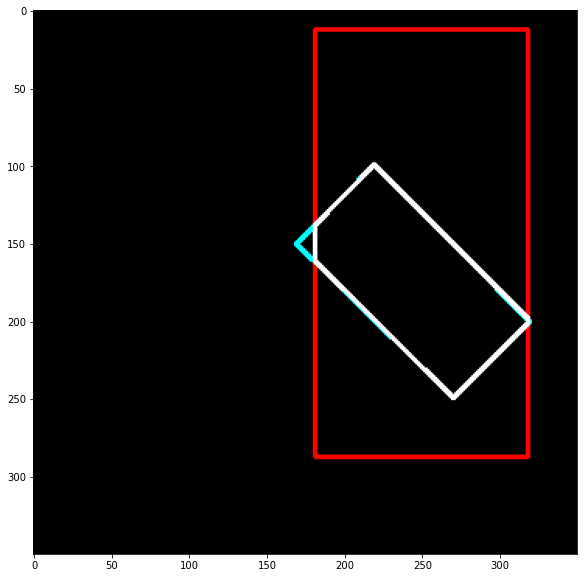

In [37]:
pts1 = np.array(subjectPolygon, np.int32).reshape((-1, 1, 2))

pts2 = np.array(clipPolygon, np.int32).reshape((-1, 1, 2))


image = np.zeros((350, 350, 3))

image = cv2.polylines(image, [pts1],
                      True, (0, 32, 32), thickness)
image = cv2.polylines(image, [pts2],
                      True, color, thickness)

clipped_polygon = clippedPolygon(subjectPolygon, subjectPolygonSize, clipPolygon, clipPolygonSize)

overlap = clipped_polygon.reshape((-1, 1, 2)).astype( np.int32 )

image = cv2.polylines(image, [overlap],
                      True, (255, 100 , 100), thickness)

plt.figure(figsize=(10,10))
plt.imshow(image)

In [24]:
default_box_area = shoelaceFormula(subjectPolygon)
gt_box_area = shoelaceFormula(clipPolygon)
clipped_polygon_area = shoelaceFormula(clipped_polygon)

In [25]:
clipped_polygon_area / ( default_box_area + gt_box_area - clipped_polygon_area )

0.25890022121541867

In [29]:
print(default_box_area)
print(gt_box_area)
print(clipped_polygon_area)

9999.99995
38025.00036877466
9876.62325962345


In [43]:
IOU = np.zeros((100, 3))

In [46]:
IOU[:, 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [84]:
# square: 
38 * 38 * 3 + 38 * 38 * 3 * 4 + \
19 * 19 * 3 + 19 * 19 * 4 * 4 + \
10 * 10 * 3 + 10 * 10 * 4 * 4 + \
5 * 5 * 3 + 5 * 5 * 4 * 4 + \
3 * 3 * 3 + 3 * 3 * 3 * 4 + \
1 * 1 * 3 + 1 * 1 * 3 * 4

31044

In [81]:
38 * 38 * 4 + 19 * 19 * 6 + 10 * 10 * 6 + 5 * 5 * 6 + 3 * 3 * 4 + 1 * 1 * 4

8732

In [88]:
n_boxes = [3, 4, 4, 4, 3, 3]
angles = [4, 4, 4, 4, 4, 4]

( angles[0] - 1 + n_boxes[0] * angles[0] ) * 38 * 38

21660

In [87]:
38 * 38 * 3 + 38 * 38 * 3 * 4 

21660